<a href="https://colab.research.google.com/github/rubeshajith/EDA-on-Telecom-Churn-Data/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [125]:
#import the required packages
import pandas as pd
import numpy as np
#import visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/data/project/Telecom Churn.csv")

### Understanding  Data

In [8]:
# Viewing the top 5 rows of the data
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
# Viewing the bottom 5 rows of the data
df.tail(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [12]:
#Getting the shape of dataset with rows and columns
df.shape

(3333, 20)

In [13]:
#Getting all the columns
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

##Description of Each Features:

**STATE**: States name in code

**Account Length**: Length of The Account

**Area Code**: Code Number of Area

**International Plan**: Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan

**Voice Mail Plan**: Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan

**Number vmail messages**: Number of Voice Mail Messages 

**Total day minutes**: Total Number of Minutes Spent in Morning

**Total day calls**: Total Number of Calls made in Morning.

**Total day charge**: Total Charge to the Customers in Morning.

**Total eve minutes**: Total Number of Minutes Spent in Evening

**Total eve calls**: Total Number of Calls made r in Evening.

**Total eve charge**: Total Charge to the Customers in Morning.

**Total night minutes**: Total Number of Minutes Spent in the Night.

**Total night calls**: Total Number of Calls made in Night.

**Total night charge**: Total Charge to the Customers in Night.

**Total intl minutes**: Total Number of minutes spent in international calls.

**Total intl calls**: Total Number of calls made internationally

**Total intl charge**: Total charge for all the international call

**Customer service calls**: Number of customer service calls made by customer

**Churn**: Customer Churn, True means churned customer, False means retained customer

In [14]:
#Getting the data types of all the columns
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [15]:
#check details about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [16]:
df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [17]:
#Looking for the description of the dataset to get insights of the data
df.describe(include='all')

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [18]:
#check for count of missing values in each column.
df.isna().sum()


State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [19]:
# Checking Duplicate Values
len(df[df.duplicated()])

0

As of now There are 3333 rows and 20 columns in above dataset.

* out of which there are 1 boolean data type i.e churn

* 8 float data type,

* 8integer data type,

* 3 object data type i.e catagarical value are there.

* There are no missing value present so no need to do the missing value imputation,

* And also there are no duplicate value present.

# Exploratory Data Analysis

### Analyzing Each Feature and with its Dependent Variable, i.e "Churn"

### Target Variable Churn

In [28]:
#Printing the unique value inside "churn" column
df["Churn"].unique()

array([False,  True])

In [29]:
#Printing the count of true and false in 'churn' feature
print(df.Churn.value_counts())

False    2850
True      483
Name: Churn, dtype: int64


In [46]:
sns.set_palette("crest")

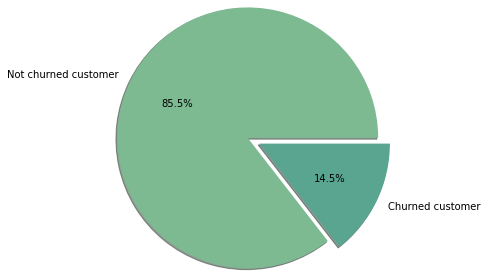

In [47]:
#To get the Donut Plot to analyze churn
plt.figure(figsize=(7,3))
plt.pie(df['Churn'].value_counts(), explode = (0, 0.2),autopct='%1.1f%%',shadow=True,radius = 2.0,
                labels = ['Not churned customer','Churned customer'])
plt.show()

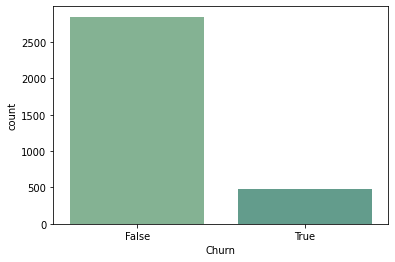

In [42]:
#let's see churn by using countplot
sns.countplot(x=df.Churn)

After analyzing the churn column, we had little to say like almost 15% of customers have churned. let's see what other features say to us and what relation we get after correlated with chur

### Analyzing State Column

In [43]:
#printing the unique value of sate column
df['State'].nunique()

51

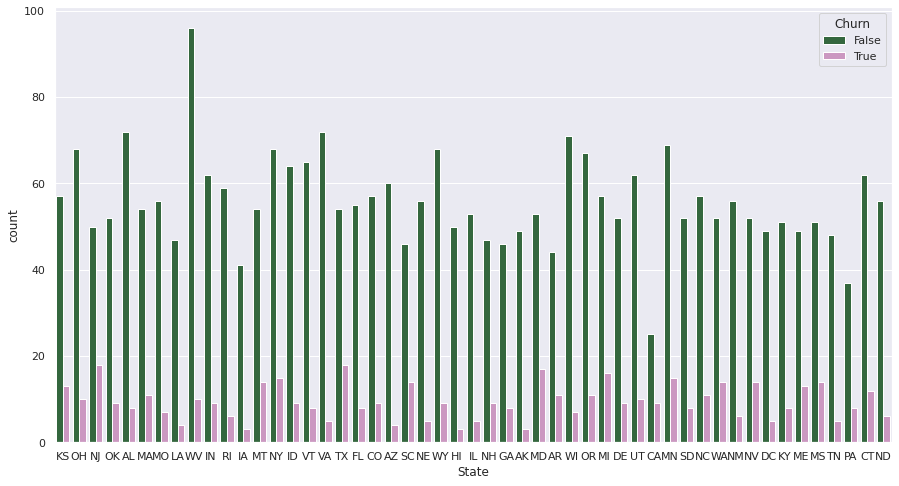

In [109]:
#Comparison churn with state by using countplot
plt.figure(figsize=(15,8))
ax = sns.countplot(x='State', hue="Churn", data=df,palette="cubehelix")
plt.show()

In [111]:
#calculate State vs Churn percentage
state_churn = pd.crosstab(df["State"],df["Churn"])
state_churn['percentage_Churn'] = state_churn.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(state_churn.sort_values(by="percentage_Churn",ascending=False))

Churn  False  True  percentage_Churn
State                               
NJ        50    18         26.470588
CA        25     9         26.470588
TX        54    18         25.000000
MD        53    17         24.285714
SC        46    14         23.333333
MI        57    16         21.917808
MS        51    14         21.538462
NV        52    14         21.212121
WA        52    14         21.212121
ME        49    13         20.967742
MT        54    14         20.588235
AR        44    11         20.000000
KS        57    13         18.571429
NY        68    15         18.072289
MN        69    15         17.857143
PA        37     8         17.777778
MA        54    11         16.923077
CT        62    12         16.216216
NC        57    11         16.176471
NH        47     9         16.071429
GA        46     8         14.814815
DE        52     9         14.754098
OK        52     9         14.754098
OR        67    11         14.102564
UT        62    10         13.888889
C

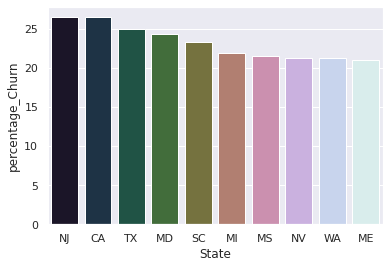

In [112]:
top_ten_state_churned = state_churn.sort_values(by="percentage_Churn",ascending=False).head(10)
sns.barplot(x= top_ten_state_churned.index,y=top_ten_state_churned["percentage_Churn"],palette="cubehelix")


* The above plot have the top 10 Churned States

* From above DataFrame we can see 51 unique state present with their churned rate.

* From the above analysis CA, NJ, TX, MD, SC, MI, MS, NV, WA, ME are the States with higher churn rate of more than 20.
* From the above top 10, CA state has the least customer and also with high churn rate
* NJ and CA States have equal churned rate
* NV and WA States too have equal churned rate
* HI State has the least churned rate compared to all States, AK and AZ States are preceding to it.
* The reason for this churn rate from a particular state may be due to the low coverage of the **Cellular Network**. Especially CA state because of its low customer and high churn rate

### Analyzing "Area Code" column

In [121]:
#calculate Area code vs Churn percentage
area_code_churn = pd.crosstab(df["Area code"],df["Churn"])
area_code_churn['Percentage_Churn'] = area_code_churn.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(area_code_churn)

Churn      False  True  Percentage_Churn
Area code                               
408          716   122         14.558473
415         1419   236         14.259819
510          715   125         14.880952


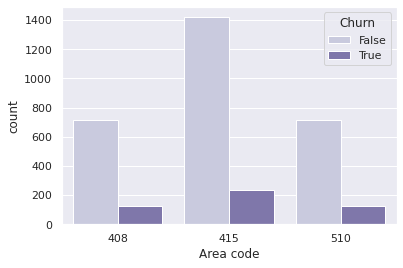

In [118]:
sns.set(style="darkgrid")
ax = sns.countplot(x='Area code', hue="Churn", data=df,palette="Purples")
plt.show()


In the above data, we notice only 3 Area codes, i.e 408,415,510 and the churn rate of these area codes are almost same.

we don't think there is any kind of relation present between the "area code" and"churn" due to which the customer leaves the operator.

### Analyzing "Account Length" column

In [122]:
#Separating churn and non churn customers
churn_df = df[df["Churn"] == bool(True)]
not_churn_df = df[df["Churn"] == bool(False)]

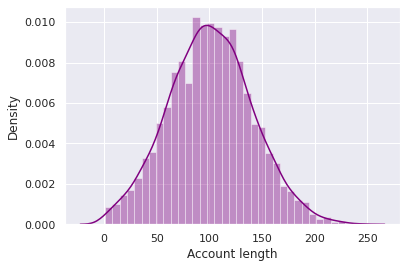

In [144]:
#Account length
sns.distplot(df['Account length'],color="purple")

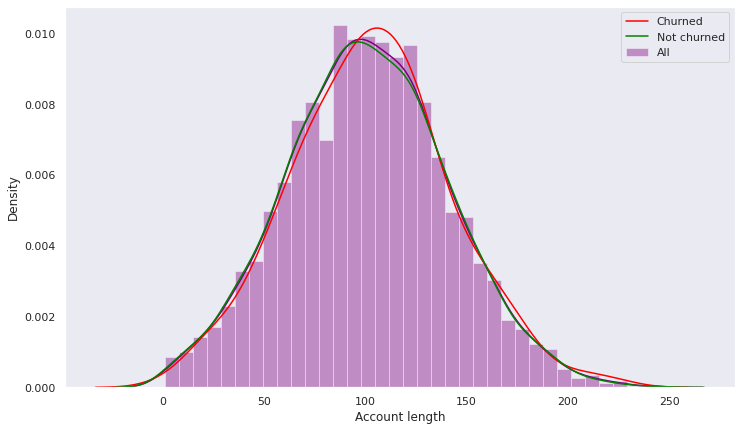

In [149]:
plt.figure(figsize=(12,7))
sns.distplot(df['Account length'],color = 'purple',label="All")
sns.kdeplot(churn_df['Account length'],color = "red",label="Churned")
sns.kdeplot(not_churn_df['Account length'],color = 'green',label="Not churned")
plt.grid(False)
plt.legend()

After analyzing various aspects of the "account length" column we didn't found any useful relation to churn. so we aren't able to build any connection to the churn as of now. let's see what other features say about the churn.

### Analyzing "International Plan" column

In [170]:

#Show count value of 'yes','no'
df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

In [171]:

#Show the unique data of "International plan"
df["International plan"].unique()

array(['No', 'Yes'], dtype=object)

In [172]:
#Calculate the International Plan vs Churn percentage 
International_plan_data = pd.crosstab(df["International plan"],df["Churn"])
International_plan_data['Percentage Churn'] = International_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(International_plan_data)

Churn               False  True  Percentage Churn
International plan                               
No                   2664   346         11.495017
Yes                   186   137         42.414861


In [176]:
sns.set_palette("Blues")

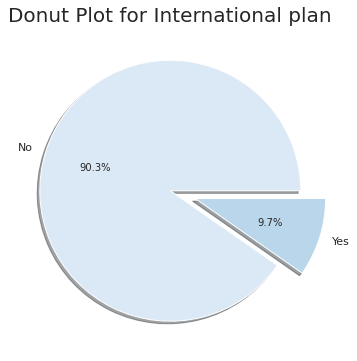

In [177]:
#To get the Donut Plot to analyze International Plan
plt.figure(figsize=(10,6))
plt.pie(df['International plan'].value_counts(), explode = (0, 0.2),autopct='%1.1f%%',shadow=True, labels = ['No','Yes'])



plt.title('Donut Plot for International plan',fontsize = 20)
plt.show()

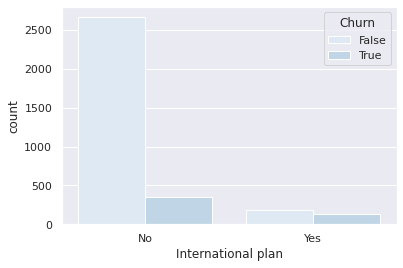

In [178]:
#Analysing by using countplot
sns.countplot(x='International plan',hue="Churn",data = df)

From the above data we get

There are 3010 customers who dont have a international plan.

There are 323 customers who have a international plan.

Among those who have a international plan 42.4 % people churn.

Whereas among those who dont have a international plan only 11.4 % people churn.

So basically the people who bought International plans are churning in big numbers.

Probably because of connectivity issues or high call charge.